In [1]:
# import pandas as pd
# import os
# import glob
# import concurrent.futures
# import time

# directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 2'
# directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 2'
# cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
# cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# # list of Excel files to read data from
# if os.path.exists(os.path.join(directory, '230201 Payment Summary - 2023-01-31T145747.301.xlsx')):
#     excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
# else:
#     excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
# try:
#     # use cols 0, Barcode; 2, Category Name
#     # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
#     pass
# except FileNotFoundError:
#     # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
#     pass
# # create an empty list to store the dataframes
# # dfs = [] sho

# outputfile =  'dataM2.csv'
# # def excel2csv
# def excel2csv(inputfile, outputfile):
    
#     # Check if exist file_path
#     if not os.path.exists(outputfile):
#         with open(outputfile, 'w') as f:
#             pass

#     # Read the first line of the file
#     with open(outputfile, 'r') as f:
#         first_line = f.readline().strip()
#     # Check if the first line contains the expected column names
#     has_headers = 'InvoiceID' in first_line
#     df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
#     # df2 Category
    
#     # merge with Category, on "Barcode"
#     df = df.merge(df2, on='Barcode', how='left')
    
#     # Check if the first line contains the expected column names
#     df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# # loop through the list of Excel files
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     [executor.submit(excel2csv, file, outputfile) for file in excel_files]
#     # for file in excel_files:
#     #     executor.submit(excel2csv,file)

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
df = pd.read_csv('dataM2.csv', dtype=dtypes, error_bad_lines=False)

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
df.info()

C:\Users\minhtriet.pham\AppData\Local\Temp\ipykernel_5956\209092472.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('dataM2.csv', dtype=dtypes, error_bad_lines=False)
Skipping line 3558206: expected 5 fields, saw 9
Skipping line 3585389: expected 5 fields, saw 8



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150193 entries, 0 to 5150192
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 176.8+ MB


In [3]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [4]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
3532684,10909,Sausage,0,0.0,nan
4862941,804042756,1,0,0.0,nan
1318,InvoiceID,Barcode,0,0.0,SubCategory Name
309175,InvoiceID,Barcode,0,0.0,SubCategory Name
404135,InvoiceID,Barcode,0,0.0,SubCategory Name
...,...,...,...,...,...
4861395,VN0237012702230060,260501000011,0,0.0,Hot pot Thai
4725637,VN0237022602230035,8801100129729,0,0.0,Distilled Spirits
4725636,VN0237022602230035,8938503352093,0,0.0,Distilled Spirits
3549484,nacks,NaN,0,0.0,nan


In [5]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010102230001,4710085206346,1,19091.0,No/Less Sugar Tea
1,VN0001010102230002,2010902000198,1,14545.0,Onigiri
2,VN0001010102230002,8935049510864,1,6364.0,Purified water
3,VN0001010102230002,2602010136625,1,14545.0,Other Bread Offsite
4,VN0001010102230003,2010809000253,1,9091.0,Fried Food Sub
...,...,...,...,...,...
5150188,VN0237022502230026,2010805000028,1,0.0,Korean cuisine Sub
5150189,VN0237022502230027,8935012443366,1,26364.0,Domestic Beer Can
5150190,VN0237022502230027,8935012443304,1,18182.0,Domestic Beer Can
5150191,VN0237022502230028,8938502525344,1,16364.0,Savoury Buns


In [18]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]


# Calculate the IQR and filter out outliers
# Q1 = np.percentile(df_filtered['Total Exclude VAT'], 25)
# Q3 = np.percentile(df_filtered['Total Exclude VAT'], 75)
# IQR = Q3 - Q1
upper_bound = 500000
lower_bound = 1000
df_filtered = df_filtered[(df_filtered['Total Exclude VAT'] >= lower_bound) & (df_filtered['Total Exclude VAT'] <= upper_bound)]

new_df = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))})

new_df

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
0083,8936040071705,1,35455.0,Tissue
VN0001010102230001,4710085206346,1,19091.0,No/Less Sugar Tea
VN0001010102230002,"2010902000198, 8935049510864, 2602010136625",3,35454.0,"Onigiri, Purified water, Other Bread Offsite"
VN0001010102230003,"2010809000253, 2701020000046",2,22727.0,"Fried Food Sub, Onigiri"
VN0001010102230004,2010403000055,1,13636.0,Local Coffee
...,...,...,...,...
VN9996020102230155,"8935049510673, 2010904000028, 8936127791113",3,48182.0,"Sugar CSD, Sandwich, WIC/RIC Juice"
VN9996020102230156,"8934588063053, 8936079140076",2,19091.0,"Purified water, Coffee Drinks Sub"
VN9996020102230157,8934564600807,1,10909.0,Sugar Tea


In [7]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = new_df.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(new_df['Total Exclude VAT'])
median = statistics.median(new_df['Total Exclude VAT'])
mode = new_df['Total Exclude VAT'].mode()[0]
std = statistics.stdev(new_df['Total Exclude VAT'])
min_val = new_df['Total Exclude VAT'].min()
max_val = new_df['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", new_df['Total Exclude VAT'].mode()[0])

Mean: 46916.350535270314
Median: 28182.0
Mode: 10909.0
Standard Deviation: 63467.29576952281
Minimum Value: 1636.0
Maximum Value: 4247142.0


In [8]:
#new_df.to_csv("dataCleanM2.csv")

In [9]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010102230001,4710085206346,1,19091.0,No/Less Sugar Tea
1,VN0001010102230002,2010902000198,1,14545.0,Onigiri
2,VN0001010102230002,8935049510864,1,6364.0,Purified water
3,VN0001010102230002,2602010136625,1,14545.0,Other Bread Offsite
4,VN0001010102230003,2010809000253,1,9091.0,Fried Food Sub
...,...,...,...,...,...
5150304,VN0237022502230026,2010805000028,1,0.0,Korean cuisine Sub
5150305,VN0237022502230027,8935012443366,1,26364.0,Domestic Beer Can
5150306,VN0237022502230027,8935012443304,1,18182.0,Domestic Beer Can
5150307,VN0237022502230028,8938502525344,1,16364.0,Savoury Buns


In [10]:
# Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 50000, 10000), np.arange(50000, 100000, 25000), np.arange(100000, 350001, 50000), [np.inf]))
bins = np.unique(bins)  # Remove duplicate edges
labels = ['{} to {}' .format(i, i+9999) for i in range(0, 50000, 10000)] + ['{} to {}' .format(i, i+24999) for i in range(50000, 100000, 25000)] + ['{} to {}' .format(i, i+49999) for i in range(100000, 300001, 50000)]+['>=350000']

def grouped_data(df_filtered):

    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(df_filtered)

grouped_data

,count,mean,median,Value
Basket Value,,,,
0 to 9999,1170045,7444.344128,8182.0,8.710218e+09
10000 to 19999,2021635,14520.098799,13636.0,2.935434e+10
20000 to 29999,869830,24892.843821,24545.0,2.165254e+10
30000 to 39999,485859,34450.919713,34545.0,1.673829e+10
40000 to 49999,142993,44935.589316,44545.0,6.425475e+09
50000 to 74999,169001,60670.338436,60000.0,1.025335e+10
75000 to 99999,58451,86348.411250,85714.0,5.047151e+09
100000 to 149999,39868,119995.522524,117273.0,4.783981e+09
150000 to 199999,17038,167771.958681,161818.0,2.858499e+09


c:\Users\minhtriet.pham\AppData\Local\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


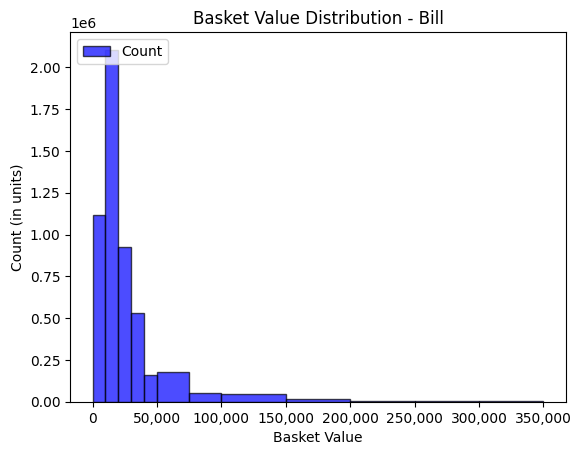

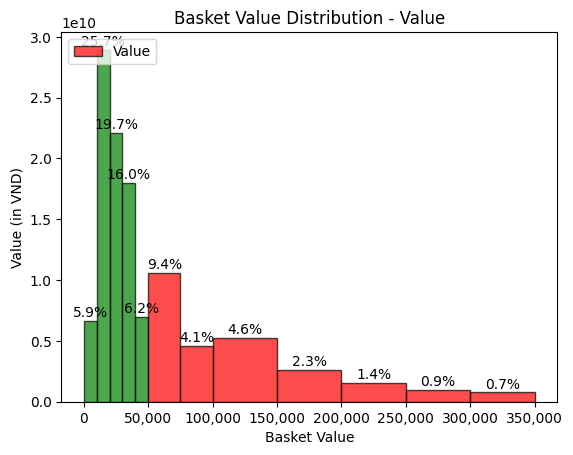

                      Count     Mean   Median         Value  %Value in total
Basket Value                                                                
0 to 9999         1,170,045    7,444    8,182  8.710218e+09         7.747295
10000 to 19999    2,021,635   14,520   13,636  2.935434e+10        26.109189
20000 to 29999      869,830   24,893   24,545  2.165254e+10        19.258833
30000 to 39999      485,859   34,451   34,545  1.673829e+10        14.887855
40000 to 49999      142,993   44,936   44,545  6.425475e+09         5.715132
50000 to 74999      169,001   60,670   60,000  1.025335e+10         9.119830
75000 to 99999       58,451   86,348   85,714  5.047151e+09         4.489184
100000 to 149999     39,868  119,996  117,273  4.783981e+09         4.255108
150000 to 199999     17,038  167,772  161,818  2.858499e+09         2.542489
200000 to 249999      5,845  219,731  215,238  1.284327e+09         1.142343
250000 to 299999      3,486  273,346  272,727  9.528833e+08         0.847541

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [12]:
grouped_data.to_csv('groupdataM2.csv')

In [13]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
new_df['StoreID'] = new_df.index.map(lambda x: x[:6])
new_df['BusinessDate'] = new_df.index.map(lambda x: x[8:14])

# Reorder the columns
new_df = new_df.reindex (columns=['StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

# Show the first 5 rows
new_df.head(5)


,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,,,
0083,0083,,8936040071705,1,35455.0,Tissue
VN0001010102230001,VN0001,010223,4710085206346,1,19091.0,No/Less Sugar Tea
VN0001010102230002,VN0001,010223,"2010902000198, 8935049510864, 2602010136625",3,35454.0,"Onigiri, Purified water, Other Bread Offsite"
VN0001010102230003,VN0001,010223,"2010809000253, 2701020000046",2,22727.0,"Fried Food Sub, Onigiri"
VN0001010102230004,VN0001,010223,2010403000055,1,13636.0,Local Coffee


In [14]:
# Calculate the ADS for each store
grouped_by_store_net = new_df.groupby('StoreID').agg({'Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net

,Total Exclude VAT,Sum of Qty,BusinessDate,ADS
StoreID,,,,
0083,35455.0,1,1,3.545500e+04
VN0001,808043136.0,47337,28,2.885868e+07
VN0002,977635508.0,47389,28,3.491555e+07
VN0003,873744622.0,48867,28,3.120517e+07
VN0004,764524207.0,48876,24,3.185518e+07
...,...,...,...,...
VN0234,301857389.0,18342,28,1.078062e+07
VN0235,362938504.0,21668,28,1.296209e+07
VN0236,363569574.0,19385,28,1.298463e+07


In [15]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Basket Value
0,VN0001010102230001,4710085206346,1,19091.0,No/Less Sugar Tea,10000 to 19999
1,VN0001010102230002,2010902000198,1,14545.0,Onigiri,10000 to 19999
2,VN0001010102230002,8935049510864,1,6364.0,Purified water,0 to 9999
3,VN0001010102230002,2602010136625,1,14545.0,Other Bread Offsite,10000 to 19999
4,VN0001010102230003,2010809000253,1,9091.0,Fried Food Sub,0 to 9999
...,...,...,...,...,...,...
5150304,VN0237022502230026,2010805000028,1,0.0,Korean cuisine Sub,NaN
5150305,VN0237022502230027,8935012443366,1,26364.0,Domestic Beer Can,20000 to 29999
5150306,VN0237022502230027,8935012443304,1,18182.0,Domestic Beer Can,10000 to 19999
5150307,VN0237022502230028,8938502525344,1,16364.0,Savoury Buns,10000 to 19999


In [16]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['Basket Value', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


          Basket Value StoreID  count           mean       Value
2            0 to 9999  VN0001   9312    7336.310674  68315725.0
3            0 to 9999  VN0002   7538    7369.077341  55548105.0
4            0 to 9999  VN0003   9942    7271.154295  72289816.0
5            0 to 9999  VN0004  11375    7560.240703  85997738.0
6            0 to 9999  VN0005   8111    7378.097645  59843750.0
...                ...     ...    ...            ...         ...
1722  100000 to 149999  VN0234     74  120764.608108   8936581.0
1723  100000 to 149999  VN0235     98  119725.367347  11733086.0
1724  100000 to 149999  VN0236    115  121268.982609  13945933.0
1725  100000 to 149999  VN0237     48  116603.479167   5596967.0
1726  100000 to 149999  VN9996      1  101818.000000    101818.0

[1682 rows x 5 columns]


In [17]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

          Basket Value StoreID  count           mean       Value  \
154          0 to 9999  VN0178   4717    7917.983676  37349129.0   
1234    50000 to 74999  VN0178    606   61586.501650  37321420.0   
1164    50000 to 74999  VN0104    618   60373.347896  37310729.0   
831     30000 to 39999  VN0207   1080   34535.586111  37298433.0   
1261    50000 to 74999  VN0205    615   60623.169106  37283249.0   
...                ...     ...    ...            ...         ...   
1838  150000 to 199999  VN0133      1  185455.000000    185455.0   
1294    50000 to 74999  VN9996      3   57878.666667    173636.0   
1726  100000 to 149999  VN9996      1  101818.000000    101818.0   
1510    75000 to 99999  VN9996      1   95455.000000     95455.0   
648     30000 to 39999    0083      1   35455.000000     35455.0   

      cumulative_sum  cumulative_percentage  
154     8.996340e+10               0.800179  
1234    9.000073e+10               0.800511  
1164    9.003804e+10               0.800842  